In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt

#1:
## gpus - tf.config.experimental.list_physical_devices('GPU')
## tf.config.experimental.set_memory_growth(gpus[0], True)

#2
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32') #(50000, 32, 32, 3)
x_test = x_test.astype('float32') #(10000, 32, 32, 3)

# on-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#3:
def normalize_image(image):
  mean = np.mean(image, axis = (0, 1, 2))
  std = np.std(image, axis = (0, 1, 2))
  image = (image - mean)/std
  return image
x_train = normalize_image(x_train)
x_test = normalize_image(x_test)

169001437/169001437 [==============================] - 14s 0us/step


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                      

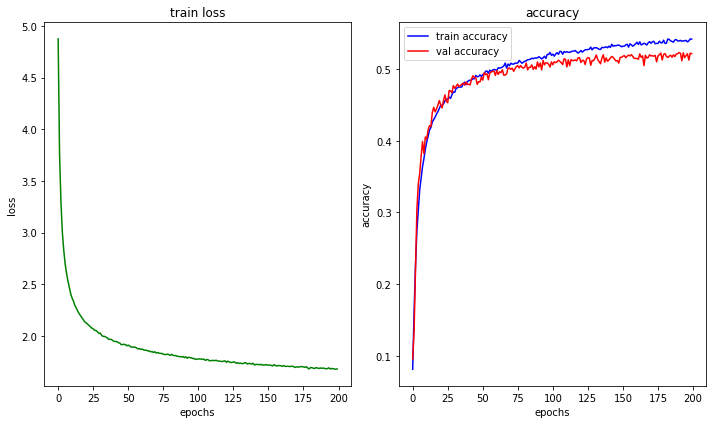

In [4]:
#4: build a model
model = tf.keras.Sequential()
model.add(Input(shape=x_train.shape[1:])) # shape=(32,32,3)

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate = 0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(rate = 0.5))

model.add(Flatten())
# model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=100, activation='softmax'))
model.summary()

#5: train and evaluate the model
opt = RMSprop(learning_rate = 0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs = 200, batch_size = 400, 
                validation_data = (x_test, y_test), verbose =1)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose = 2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 2)

#6: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'], "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'], "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()